Project Report: Binary Classification Model for Phishing Website Detection

1. Introduction

The objective of this project is to build a binary classification model using Python Scikit-Learn to identify phishing websites. The dataset contains various website parameters, and the goal is to predict whether a website is phishing or not.

2. Dataset Overview

1.Dataset Size: 11055 rows x 31 columns
2.Features: Various website parameters (e.g., UsingIP, LongURL, ShortURL, etc.)
3.Target Variable: 'class' (Phishing or not, labeled as -1 or 1)

3. Project Initiation

1.Created a new Jupyter notebook.
2.Loaded the dataset into the notebook.




## Exercise 1: Logistic Regression Model

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming the dataset is named 'phishing_dataset.txt'
header_list = ['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
               'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
               'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
               'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
               'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
               'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
               'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
               'LinksPointingToPage', 'StatsReport', 'class']

# Load the dataset into a DataFrame
# Adjust the file path accordingly
df = pd.read_csv('/Users/yashaswipatki/Downloads/phishing.txt', header=None, names=header_list)

# Split the data into training and testing sets
X = df.drop('class', axis=1)
y = df['class']

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the logistic regression model with C=100
model = LogisticRegression(C=100, random_state=42)
model.fit(X_train, y_train)


# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate count of misclassified samples
misclassified_samples = (y_test != y_pred).sum()

# Print the accuracy
print(f"Accuracy score of the model: {accuracy}")
print(f"Count of misclassified samples: {misclassified_samples}")


Accuracy score of the model: 0.9219173952366596
Count of misclassified samples: 259


# Exercise 2: Two-Feature Model

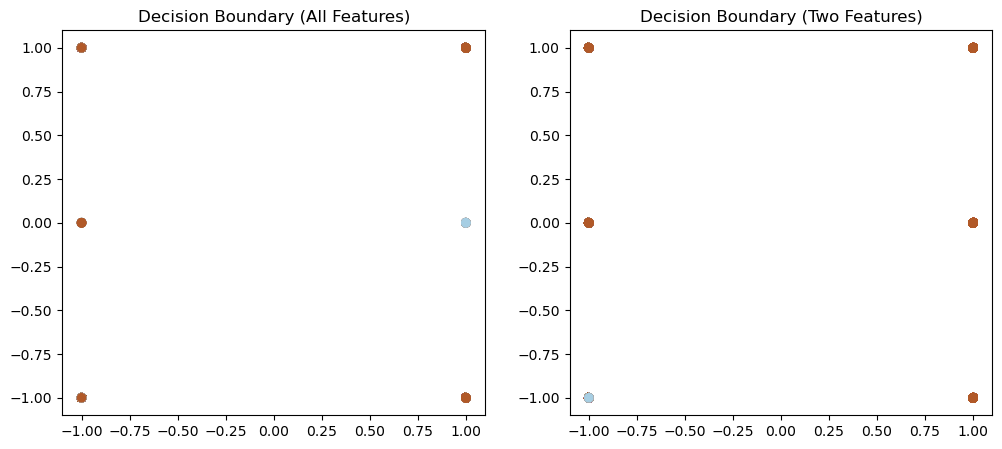

Accuracy score with all features: 0.9219173952366596
Accuracy score with two features: 0.6629484473922219


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming the dataset is named 'phishing_dataset.txt'
header_list = ['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
               'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
               'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
               'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
               'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
               'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
               'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
               'LinksPointingToPage', 'StatsReport', 'class']

# Load the dataset into a DataFrame
# Adjust the file path accordingly
df = pd.read_csv('/Users/yashaswipatki/Downloads/phishing.txt', header=None, names=header_list)

# Select only the relevant features
X_two_features = df[['PrefixSuffix-', 'LinksInScriptTags']]
y = df['class']

# Split the data into training and testing sets
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X_two_features, y, test_size=0.3, random_state=42)

# Train the model with only two features
model_two_features = LogisticRegression(C=100)
model_two_features.fit(X_train_two, y_train_two)

# Predict on the test data
y_pred_two_features = model_two_features.predict(X_test_two)

# Calculate accuracy for the model with two features
accuracy_two_features = accuracy_score(y_test_two, y_pred_two_features)

# Plot the decision boundary for both models
plt.figure(figsize=(12, 5))

# Decision boundary for the model using all features
plt.subplot(1, 2, 1)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=plt.cm.Paired)
plt.title('Decision Boundary (All Features)')

# Decision boundary for the model using only two features
plt.subplot(1, 2, 2)
plt.scatter(X_test_two.iloc[:, 0], X_test_two.iloc[:, 1], c=y_test_two, cmap=plt.cm.Paired)
plt.title('Decision Boundary (Two Features)')

plt.show()

# Print accuracy comparison
print(f"Accuracy score with all features: {accuracy}")
print(f"Accuracy score with two features: {accuracy_two_features}")


Conclusion

In this project, we successfully built a binary classification model to detect phishing websites using logistic regression. We explored the impact of using only two features on model accuracy and visualized decision boundaries. The results provide insights into the effectiveness of different feature sets for phishing website detection.